In [ ]:
# Questão 01

Resultados das Regressões:
--------------------------------------------------
I. Valores encontrados em (a): Regressão Linear
   Equação: d = 0.4158 * t + (-0.4128)
   Correlação de Pearson: 0.9716
--------------------------------------------------
II. Valores encontrados em (b): Regressão Quadrática
   Equação: d = 6.0982 * t^2 + (-119.9232) * t + (594.1750)
   Correlação de Pearson: 0.9987
--------------------------------------------------
III. Valores encontrados em (c): Regressão Linear
   Equação: d = 99.2500 * t + (-1114.5333)
   Correlação de Pearson: 0.9591
--------------------------------------------------


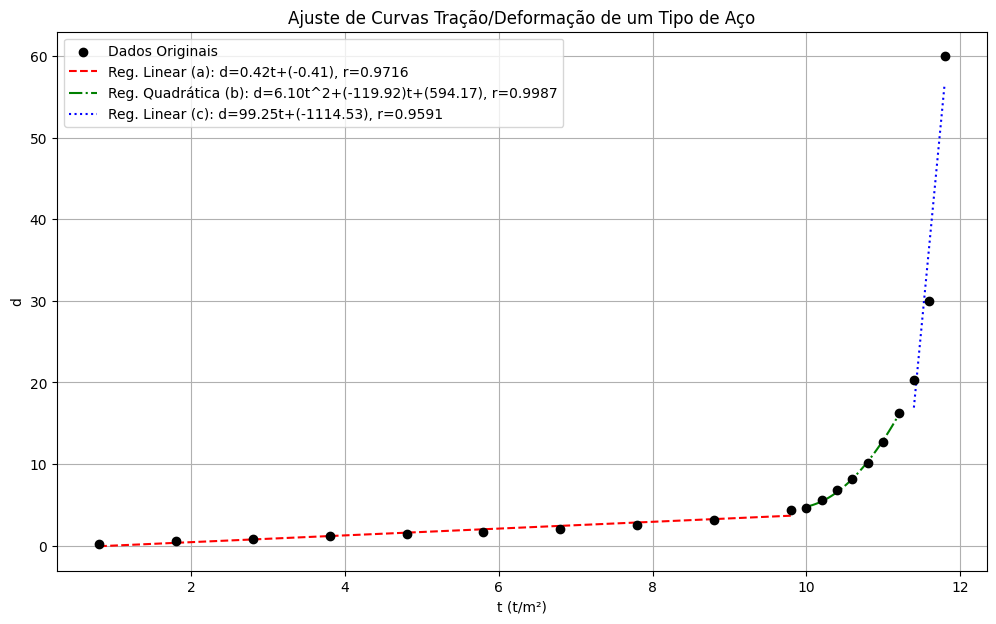

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dados fornecidos na questão
t_full = np.array([0.8, 1.8, 2.8, 3.8, 4.8, 5.8, 6.8, 7.8, 8.8, 9.8,10.0, 10.2, 10.4, 10.6, 10.8, 11.0, 11.2,11.4, 11.6, 11.8])
d_full = np.array([0.15, 0.52, 0.76, 1.12, 1.47, 1.71, 2.08, 2.56, 3.19, 4.35,4.55, 5.64, 6.76, 8.17, 10.1, 12.7, 16.2,20.3, 30.0, 60.0])

# --- a) Regressão linear para os dez primeiros pontos (0.8 <= t <= 9.8) ---
t_a = t_full[0:10]
d_a = d_full[0:10]

# Ajuste linear: d = m*t + c
coeffs_a = np.polyfit(t_a, d_a, 1)
m_a, c_a = coeffs_a[0], coeffs_a[1]

# Valores previstos para cálculo da correlação
d_a_pred = m_a * t_a + c_a
# Correlação de Pearson
corr_a = np.corrcoef(d_a, d_a_pred)[0, 1] # ou np.corrcoef(t_a, d_a)[0,1] para linear

# --- b) Regressão quadrática para os sete pontos seguintes (10.0 <= t <= 11.2) ---
t_b = t_full[10:17]
d_b = d_full[10:17]

# Ajuste quadrático: d = a*t^2 + b*t + c
coeffs_b = np.polyfit(t_b, d_b, 2)
a_b, b_b, c_b_quad = coeffs_b[0], coeffs_b[1], coeffs_b[2] # Renomeado c_b para c_b_quad para evitar conflito

# Valores previstos para cálculo da correlação
d_b_pred = a_b * t_b**2 + b_b * t_b + c_b_quad
# Correlação de Pearson entre d_b (observado) e d_b_pred (previsto)
corr_b = np.corrcoef(d_b, d_b_pred)[0, 1]

# --- c) Regressão linear para os três últimos pontos (11.4 <= t <= 11.8) ---
t_c = t_full[17:20]
d_c = d_full[17:20]

# Ajuste linear: d = m*t + c
coeffs_c = np.polyfit(t_c, d_c, 1)
m_c, c_c_lin = coeffs_c[0], coeffs_c[1] # Renomeado c_c para c_c_lin

# Valores previstos para cálculo da correlação
d_c_pred = m_c * t_c + c_c_lin
# Correlação de Pearson
corr_c = np.corrcoef(d_c, d_c_pred)[0, 1] # ou np.corrcoef(t_c, d_c)[0,1] para linear


# --- Apresentação dos resultados ---
print("Resultados das Regressões:")
print("--------------------------------------------------")
print("I. Valores encontrados em (a): Regressão Linear")
print(f"   Equação: d = {m_a:.4f} * t + ({c_a:.4f})") # Parenteses para clareza se c_a for negativo
print(f"   Correlação de Pearson: {corr_a:.4f}")
print("--------------------------------------------------")
print("II. Valores encontrados em (b): Regressão Quadrática")
print(f"   Equação: d = {a_b:.4f} * t^2 + ({b_b:.4f}) * t + ({c_b_quad:.4f})")
print(f"   Correlação de Pearson: {corr_b:.4f}")
print("--------------------------------------------------")
print("III. Valores encontrados em (c): Regressão Linear")
print(f"   Equação: d = {m_c:.4f} * t + ({c_c_lin:.4f})")
print(f"   Correlação de Pearson: {corr_c:.4f}")
print("--------------------------------------------------")

# --- Geração do Gráfico ---
plt.figure(figsize=(12, 7))

# Plotar todos os pontos originais
plt.scatter(t_full, d_full, color='black', label='Dados Originais', zorder=5)

# Plotar a regressão linear (a)
t_plot_a = np.linspace(t_a.min(), t_a.max(), 100)
d_plot_a = m_a * t_plot_a + c_a
plt.plot(t_plot_a, d_plot_a, color='red', linestyle='--', label=f'Reg. Linear (a): d={m_a:.2f}t+({c_a:.2f}), r={corr_a:.4f}')

# Plotar a regressão quadrática (b)
t_plot_b = np.linspace(t_b.min(), t_b.max(), 100)
d_plot_b = a_b * t_plot_b**2 + b_b * t_plot_b + c_b_quad
plt.plot(t_plot_b, d_plot_b, color='green', linestyle='-.', label=f'Reg. Quadrática (b): d={a_b:.2f}t^2+({b_b:.2f})t+({c_b_quad:.2f}), r={corr_b:.4f}')

# Plotar a regressão linear (c)
t_plot_c = np.linspace(t_c.min(), t_c.max(), 100)
d_plot_c = m_c * t_plot_c + c_c_lin
plt.plot(t_plot_c, d_plot_c, color='blue', linestyle=':', label=f'Reg. Linear (c): d={m_c:.2f}t+({c_c_lin:.2f}), r={corr_c:.4f}')

plt.xlabel('t (t/m²)')
plt.ylabel('d')
plt.title('Ajuste de Curvas Tração/Deformação de um Tipo de Aço')
plt.legend()
plt.grid(True)
plt.show()